In [29]:
import numpy as np
import tensorflow as tf

latest = tf.train.latest_checkpoint("")
latest

g = tf.Graph()
with g.as_default():
    saver = tf.train.import_meta_graph('model_200.ckpt.meta')

sess = tf.Session(graph = g)

with sess.as_default():
    saver.restore(sess, 'model_200.ckpt')
    

In [30]:
[op.name for op in g.get_operations()]

['tf_x',
 'tf_x_image/shape',
 'tf_x_image',
 'tf_y',
 'tf_y_onehot/on_value',
 'tf_y_onehot/off_value',
 'tf_y_onehot/depth',
 'tf_y_onehot',
 'is_train',
 'layer1/kernel/Initializer/random_uniform/shape',
 'layer1/kernel/Initializer/random_uniform/min',
 'layer1/kernel/Initializer/random_uniform/max',
 'layer1/kernel/Initializer/random_uniform/RandomUniform',
 'layer1/kernel/Initializer/random_uniform/sub',
 'layer1/kernel/Initializer/random_uniform/mul',
 'layer1/kernel/Initializer/random_uniform',
 'layer1/kernel',
 'layer1/kernel/Assign',
 'layer1/kernel/read',
 'layer1/bias/Initializer/zeros',
 'layer1/bias',
 'layer1/bias/Assign',
 'layer1/bias/read',
 'layer1/dilation_rate',
 'layer1/Conv2D',
 'layer1/BiasAdd',
 'layer1/Sigmoid',
 'layer1_pool/MaxPool',
 'layer2/kernel/Initializer/random_uniform/shape',
 'layer2/kernel/Initializer/random_uniform/min',
 'layer2/kernel/Initializer/random_uniform/max',
 'layer2/kernel/Initializer/random_uniform/RandomUniform',
 'layer2/kernel/Init

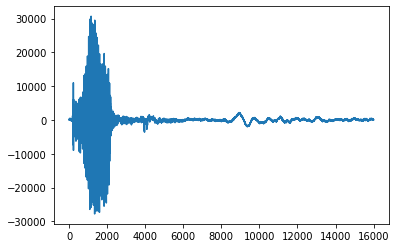

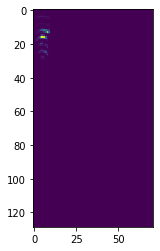

2.4848573e-11
46.36685
(129, 71)
(129, 71)


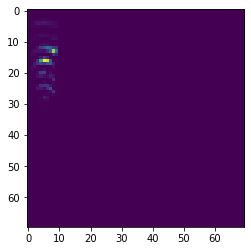

(1, 70, 70)


In [31]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
fs, data = wavfile.read('voice_sample.wav')

plt.plot(data)
plt.show()

f, t, Sxx = spectrogram(data, window='hamming')
plt.imshow(Sxx)
plt.show()

sigma = np.std(Sxx)
X_data = Sxx / sigma
print(np.min(X_data))
print(np.max(X_data))
print(X_data.shape)

print(X_data.shape)
X_image = X_data[:70, :70]
plt.imshow(X_image)
plt.show()
X_image = np.expand_dims(X_image, axis=0)
print(X_image.shape)


X_input = np.reshape(X_image, (-1, 4900))
label_names = ['no', 'yes', 'on', 'off', 'down', 'up', 'left', 'right', 'go', 'wow']

In [32]:
with sess.as_default():
    feed = {'tf_x:0' : X_input, 'is_train:0' : False}
    y_pred = sess.run(['predicted_labels:0'], feed_dict=feed)

y_pred = np.array(y_pred)
idx = y_pred[0][0]
print(idx)

print(label_names[idx])

5
up
